In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('Toy2.xlsx')
df.head()

,Day,Type,Feature1,Feature2,Feature3,Outcome
0,1,C,0.403660,0.278940,P,0
1,1,A,0.073550,0.510298,P,0
2,1,B,0.375664,0.299433,P,0
3,1,A,0.058319,0.612322,P,0
4,1,B,0.114592,0.336539,P,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,75.0,2.866667,1.368895,1.000000,2.000000,3.000000,4.000000,5.000000
Feature1,75.0,0.333402,0.220441,-0.094686,0.153485,0.348296,0.462211,0.797487
Feature2,75.0,0.397321,0.232725,-0.097380,0.210675,0.404492,0.570477,0.801860


In [4]:
#df.drop(columns = 'Day',inplace = True)

In [5]:
df.Feature3 = df.Feature3.replace('?','Q')

In [6]:
df.Outcome = df.Outcome.replace('?',0)

In [7]:
df.Outcome.value_counts()

1    39
0    36
Name: Outcome, dtype: int64

In [8]:
df.Feature3.value_counts()

P    35
Q    20
R    20
Name: Feature3, dtype: int64

In [9]:
#df = pd.get_dummies(df,columns = ['Type'])

In [10]:
label_encoder=LabelEncoder()

In [11]:
df["Type"]=label_encoder.fit_transform(df["Type"])

In [12]:
df["Feature3"]=label_encoder.fit_transform(df["Feature3"])

In [13]:
df = df.iloc[:64,:]
df.tail()

,Day,Type,Feature1,Feature2,Feature3,Outcome
59,4,0,0.604599,0.470533,2,1
60,4,0,0.409691,0.058819,0,1
61,4,2,0.134982,0.079770,1,1
62,4,2,0.639036,0.587389,0,1
63,4,0,0.204368,0.160738,2,1


In [14]:
y = df[['Outcome']]
y

,Outcome
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [15]:
X = df.drop(columns = ['Outcome'])
X

,Day,Type,Feature1,Feature2,Feature3
0,1,2,0.403660,0.278940,0
1,1,0,0.073550,0.510298,0
2,1,1,0.375664,0.299433,0
3,1,0,0.058319,0.612322,0
4,1,1,0.114592,0.336539,0
5,1,0,0.359324,0.645558,1
6,1,0,0.367294,0.038727,0
7,1,2,0.010934,0.486143,0
8,1,2,0.340746,0.545526,0
9,1,0,0.366915,0.191710,0


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (51, 5) (51, 1)
Test set: (13, 5) (13, 1)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k = 2
#Train model and predict
neigh = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
neigh

C:\Users\oktay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [19]:
yhat = neigh.predict(x_test)
yhat.shape
y_test.shape

(13, 1)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", (metrics.accuracy_score(y_test, yhat)))

Train set Accuracy:  0.7254901960784313
Test set Accuracy:  0.6153846153846154


In [21]:
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat.reshape(-1,1)==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Users\oktay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oktay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oktay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oktay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.61538462, 0.69230769, 0.69230769, 0.61538462, 0.61538462,
       0.46153846, 0.61538462, 0.61538462, 0.76923077, 0.84615385,
       0.76923077, 0.76923077, 0.76923077, 0.69230769, 0.69230769])

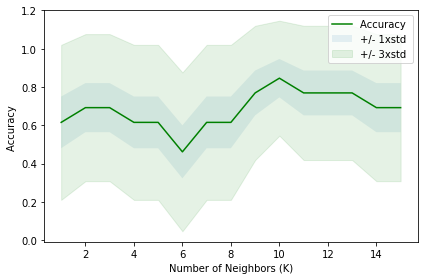

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()